---
title: "The Monte Carlo Approach"
summary: "Simulation is easier than algebra"
date: 2020-05-10
source: jupyter
---

In *Monte Carlo* approaches, we use random simulations to answer questions 
that might otherwise require some difficult equations.
Confusingly, they're also known in some fields 
as *numerical* approaches, and are contrasted with *analytic* approaches,
where you just work out the correct equation.
[Wikipedia tells us](https://en.wikipedia.org/wiki/Monte_Carlo_method#History) that,
yes, Monte Carlo methods are named after the casino.

The best-known Monte Carlo method is 
[Markov Chain Monte Carlo](https://en.wikipedia.org/wiki/Markov_chain_Monte_Carlo),
which comes up a lot in Bayesian statistics.
In this post, I cover a much simpler example.
Here's a simple Monte Carlo example.
Let's say you want to know the area of a circle
with a radius of $r$.
We'll use a unit circle, $r=1$, in this example.

/home/eoin/miniconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


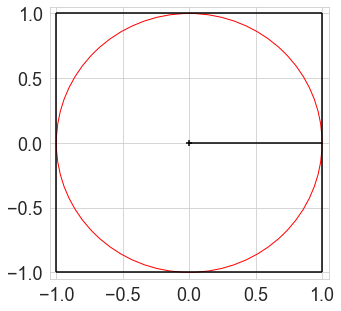

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
sns.set_style('whitegrid')
rcParams['figure.figsize'] = (6, 4)
rcParams['font.size'] = 18

def circle_plot():
    fig, ax = plt.subplots(figsize=(5, 5))
    plt.hlines([-1, 1], -1, 1)
    plt.vlines([-1, 1], -1, 1)
    plt.plot([0, 1], [0, 0], color='k')
    plt.scatter(0, 0, marker='+', color='k')
    plt.xlim(-1.05, 1.05)
    plt.ylim(-1.05, 1.05)
    circle = plt.Circle((0, 0), 1, facecolor='None', edgecolor='r')
    ax.add_artist(circle)
    return fig, ax

circle_plot();

Analytically, you know that the answer is 

$$\text{Area} = \pi r^2$$ 

What if we didn't know this equation?
The Monte Carlo solution is as follows.
We know that the area of the bounding square is $2r \times 2r = 4r^2$
We need to figure out what proportion of this square is taken up by the circle.
To find out, we randomly select a large number of points in the square,
and check if they're within $r$ of the center point $[0, 0]$.

0.7810 of points are in the circle


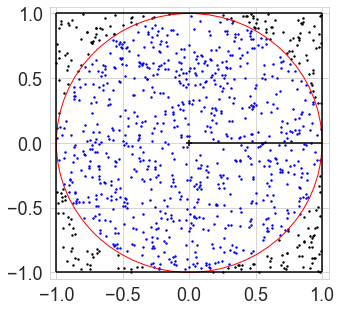

In [2]:
n = 1000 # Number of points to simulate
x = np.random.uniform(low=-1, high=1, size=n)
y = np.random.uniform(low=-1, high=1, size=n)
# Distance from center (Pythagoras)
dist_from_origin = np.sqrt(x**2 + y**2)
# Check is distance is less than radius
is_in_circle = dist_from_origin < 1

# Plot results
circle_plot()
plt.scatter(x[is_in_circle], y[is_in_circle], color='b', s=2)     # Points in circle
plt.scatter(x[~is_in_circle], y[~is_in_circle], color='k', s=2);  # Points outside circle

m = is_in_circle.mean()
print('%.4f of points are in the circle' % m)

Since the area of the square is $4r^2$,
and the circle takes up ~$0.78$ of the square,
the area of the circle is roughly 

$$
\begin{align}
\text{Area} 
 &\approx 0.78 \times 4r^2 \newline
 &= 3.14r^2 \newline
 &\approx \pi r^2
\end{align}
$$

We've discovered $\pi$.